# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings 
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('/Users/macbookjp/Documents/PYTHONWS/EDA Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

In [15]:
import glob
file_pattern = "/Users/macbookjp/Documents/PYTHONWS/EDA Assignment/Datasets and Dictionary/trip_records/*.parquet"

parquet_files = glob.glob(file_pattern)

sampled_df_list = []

for file in parquet_files:
    # Load the data from the current Parquet file
    df = pd.read_parquet(file)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['Date'] = df['tpep_pickup_datetime'].dt.date
    df['Hour'] = df['tpep_pickup_datetime'].dt.hour
    # 5% on Data by Date and Hour
    sampled_df = df.groupby(['Date', 'Hour']).apply(lambda x: x.sample(frac=0.05)).reset_index(drop=True)
    sampled_df = sampled_df.reset_index(drop=True)
    sampled_df_list.append(sampled_df)

final_sampled_df = pd.concat(sampled_df_list, ignore_index=True)

# Taking data with 2.5L rangle
if 250000 <= len(final_sampled_df) <= 300000:
    filtered_df = final_sampled_df
else:
    filtered_df = final_sampled_df.sample(n=250000) if len(final_sampled_df) > 300000 else final_sampled_df.sample(n=300000)

filtered_df.shape

(250000, 22)

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [17]:
# Load the new data file
NYTaxidf = pd.read_csv('filtered_df.csv')
NYTaxidf.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Date,Hour,airport_fee
0,2,2023-11-27 18:03:05,2023-11-27 18:21:38,1.0,4.54,1.0,N,170,74,1,...,0.5,2.91,0.0,1.0,32.01,2.5,0.00,2023-11-27,18,NaN
1,2,2023-12-13 18:18:05,2023-12-13 19:08:44,1.0,23.94,1.0,N,132,14,1,...,0.5,20.00,0.0,1.0,117.65,0.0,1.75,2023-12-13,18,NaN
2,2,2023-07-03 08:20:06,2023-07-03 08:33:37,1.0,2.98,1.0,N,163,75,1,...,0.5,4.06,0.0,1.0,24.36,2.5,0.00,2023-07-03,8,NaN
3,2,2023-07-29 15:21:06,2023-07-29 15:32:13,1.0,1.36,1.0,N,43,161,2,...,0.5,0.00,0.0,1.0,15.40,2.5,0.00,2023-07-29,15,NaN
4,2,2023-02-06 09:24:49,2023-02-06 09:28:12,1.0,0.54,1.0,N,90,246,1,...,0.5,1.00,0.0,1.0,10.80,2.5,0.00,2023-02-06,9,NaN


In [19]:
NYTaxidf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Date,Hour,airport_fee
0,2,2023-11-27 18:03:05,2023-11-27 18:21:38,1.0,4.54,1.0,N,170,74,1,...,0.5,2.91,0.0,1.0,32.01,2.5,0.00,2023-11-27,18,NaN
1,2,2023-12-13 18:18:05,2023-12-13 19:08:44,1.0,23.94,1.0,N,132,14,1,...,0.5,20.00,0.0,1.0,117.65,0.0,1.75,2023-12-13,18,NaN
2,2,2023-07-03 08:20:06,2023-07-03 08:33:37,1.0,2.98,1.0,N,163,75,1,...,0.5,4.06,0.0,1.0,24.36,2.5,0.00,2023-07-03,8,NaN
3,2,2023-07-29 15:21:06,2023-07-29 15:32:13,1.0,1.36,1.0,N,43,161,2,...,0.5,0.00,0.0,1.0,15.40,2.5,0.00,2023-07-29,15,NaN
4,2,2023-02-06 09:24:49,2023-02-06 09:28:12,1.0,0.54,1.0,N,90,246,1,...,0.5,1.00,0.0,1.0,10.80,2.5,0.00,2023-02-06,9,NaN


In [21]:
NYTaxidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               250000 non-null  int64  
 1   tpep_pickup_datetime   250000 non-null  object 
 2   tpep_dropoff_datetime  250000 non-null  object 
 3   passenger_count        241458 non-null  float64
 4   trip_distance          250000 non-null  float64
 5   RatecodeID             241458 non-null  float64
 6   store_and_fwd_flag     241458 non-null  object 
 7   PULocationID           250000 non-null  int64  
 8   DOLocationID           250000 non-null  int64  
 9   payment_type           250000 non-null  int64  
 10  fare_amount            250000 non-null  float64
 11  extra                  250000 non-null  float64
 12  mta_tax                250000 non-null  float64
 13  tip_amount             250000 non-null  float64
 14  tolls_amount           250000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [23]:
# Fix the index and drop any columns that are not needed
NYTaxidf = NYTaxidf.reset_index(drop=True)
NYTaxidf.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Date,Hour,airport_fee
0,2,2023-11-27 18:03:05,2023-11-27 18:21:38,1.0,4.54,1.0,N,170,74,1,...,0.5,2.91,0.0,1.0,32.01,2.5,0.00,2023-11-27,18,NaN
1,2,2023-12-13 18:18:05,2023-12-13 19:08:44,1.0,23.94,1.0,N,132,14,1,...,0.5,20.00,0.0,1.0,117.65,0.0,1.75,2023-12-13,18,NaN
2,2,2023-07-03 08:20:06,2023-07-03 08:33:37,1.0,2.98,1.0,N,163,75,1,...,0.5,4.06,0.0,1.0,24.36,2.5,0.00,2023-07-03,8,NaN
3,2,2023-07-29 15:21:06,2023-07-29 15:32:13,1.0,1.36,1.0,N,43,161,2,...,0.5,0.00,0.0,1.0,15.40,2.5,0.00,2023-07-29,15,NaN
4,2,2023-02-06 09:24:49,2023-02-06 09:28:12,1.0,0.54,1.0,N,90,246,1,...,0.5,1.00,0.0,1.0,10.80,2.5,0.00,2023-02-06,9,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [25]:
# Combine the two airport fee columns

NYTaxidf['Airport_fee'] = NYTaxidf['airport_fee'].fillna(0) + NYTaxidf['Airport_fee'].fillna(0)
NYTaxidf['Airport_fee']

0         0.00
1         1.75
2         0.00
3         0.00
4         0.00
          ... 
249995    1.75
249996    0.00
249997    0.00
249998    0.00
249999    1.25
Name: Airport_fee, Length: 250000, dtype: float64

In [39]:
# Drop airport_fee column as we merged both columns
NYTaxidf = NYTaxidf.drop(columns=['airport_fee'])
NYTaxidf

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Date,Hour
0,2,2023-11-27 18:03:05,2023-11-27 18:21:38,1.0,4.54,1.0,N,170,74,1,...,2.50,0.5,2.91,0.00,1.0,32.01,2.5,0.00,2023-11-27,18
1,2,2023-12-13 18:18:05,2023-12-13 19:08:44,1.0,23.94,1.0,N,132,14,1,...,2.50,0.5,20.00,0.00,1.0,117.65,0.0,1.75,2023-12-13,18
2,2,2023-07-03 08:20:06,2023-07-03 08:33:37,1.0,2.98,1.0,N,163,75,1,...,0.00,0.5,4.06,0.00,1.0,24.36,2.5,0.00,2023-07-03,8
3,2,2023-07-29 15:21:06,2023-07-29 15:32:13,1.0,1.36,1.0,N,43,161,2,...,0.00,0.5,0.00,0.00,1.0,15.40,2.5,0.00,2023-07-29,15
4,2,2023-02-06 09:24:49,2023-02-06 09:28:12,1.0,0.54,1.0,N,90,246,1,...,0.00,0.5,1.00,0.00,1.0,10.80,2.5,0.00,2023-02-06,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2,2023-06-13 23:16:52,2023-06-13 23:32:59,1.0,8.19,1.0,N,138,170,1,...,6.00,0.5,5.00,6.55,1.0,56.40,2.5,1.75,2023-06-13,23
249996,2,2023-06-16 20:40:42,2023-06-16 20:50:41,1.0,1.68,1.0,N,43,143,2,...,1.00,0.5,0.00,0.00,1.0,17.10,2.5,0.00,2023-06-16,20
249997,1,2023-04-18 10:38:19,2023-04-18 10:55:06,2.0,3.10,1.0,N,231,68,1,...,2.50,0.5,4.30,0.00,1.0,26.00,2.5,0.00,2023-04-18,10
249998,2,2023-01-14 14:00:51,2023-01-14 14:13:49,1.0,0.53,1.0,N,246,48,2,...,0.00,0.5,0.00,0.00,1.0,16.10,2.5,0.00,2023-01-14,14


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [27]:
# check where values of fare amount are negative
negative_values = (NYTaxidf['fare_amount'] < 0 ).any()
print(negative_values)


False


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
No negative fareamounts for me


In [29]:
# Find which columns have negative values
monetary_col = NYTaxidf.select_dtypes(include=['number']).columns
for column in monetary_col:
    neg_val = NYTaxidf[column] < 0
    if neg_val.any():
        print(f"Negative values found in col '{column}':")
        print(NYTaxidf.loc[neg_val,column])



Negative values found in col 'mta_tax':
6023     -0.5
16284    -0.5
18090    -0.5
38587    -0.5
51695    -0.5
53342    -0.5
74678    -0.5
77899    -0.5
86585    -0.5
103923   -0.5
145601   -0.5
175641   -0.5
216484   -0.5
247861   -0.5
Name: mta_tax, dtype: float64
Negative values found in col 'improvement_surcharge':
6023     -1.0
16284    -1.0
18090    -1.0
34405    -1.0
38587    -1.0
51695    -1.0
53342    -1.0
74678    -1.0
77899    -1.0
86585    -1.0
103923   -1.0
145601   -1.0
175641   -1.0
216484   -1.0
247861   -1.0
Name: improvement_surcharge, dtype: float64
Negative values found in col 'total_amount':
6023     -4.00
16284    -4.00
18090    -2.75
34405    -3.50
38587    -4.00
51695    -4.00
53342    -2.75
74678    -4.00
77899    -4.00
86585    -4.00
103923   -3.25
145601   -4.00
175641   -3.25
216484   -4.00
247861   -4.00
Name: total_amount, dtype: float64
Negative values found in col 'congestion_surcharge':
6023     -2.5
16284    -2.5
34405    -2.5
38587    -2.5
51695    -2.

In [33]:
# fix these negative values
for column in monetary_col:
    neg_val = NYTaxidf[column] < 0
    if neg_val.any():
        print(f"Negative values found in col '{column}':")
        print(NYTaxidf.loc[neg_val,column])
        NYTaxidf[column]= NYTaxidf[column].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [35]:
# Find the proportion of missing values in each column
missing_proportion = NYTaxidf.isnull().mean()
print("Proportion of missing values in each column:")
print(missing_proportion)

Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034168
trip_distance            0.000000
RatecodeID               0.034168
store_and_fwd_flag       0.034168
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034168
Airport_fee              0.000000
Date                     0.000000
Hour                     0.000000
airport_fee              0.922080
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [41]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls_in_passenger_count = NYTaxidf[NYTaxidf['passenger_count'].isnull()]
print("Rows where 'passenger_count' has null values")
print(rows_with_nulls_in_passenger_count)

Rows where 'passenger_count' has null values
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29             1  2023-01-01 02:16:18   2023-01-01 02:30:20              NaN   
79             2  2023-10-01 15:23:40   2023-10-01 15:35:35              NaN   
116            2  2023-05-29 08:30:28   2023-05-29 08:37:47              NaN   
117            2  2023-03-05 13:01:37   2023-03-05 13:30:40              NaN   
140            1  2023-10-08 03:27:48   2023-10-08 03:38:19              NaN   
...          ...                  ...                   ...              ...   
249926         2  2023-10-31 20:42:28   2023-10-31 20:59:03              NaN   
249927         2  2023-07-20 07:21:05   2023-07-20 07:39:24              NaN   
249940         2  2023-04-08 20:48:13   2023-04-08 21:00:30              NaN   
249977         1  2023-09-09 21:51:20   2023-09-09 22:07:12              NaN   
249985         1  2023-05-12 17:39:23   2023-05-12 17:57:21              Na

In [43]:
mode_value = NYTaxidf['passenger_count'].mode()[0]

# Fill missing values with the mode
NYTaxidf['passenger_count']= NYTaxidf['passenger_count'].fillna(mode_value)

Did you find zeroes in passenger_count? Handle these.

In [45]:
# Handle zeros in passenger_count
NYTaxidf['passenger_count'] = NYTaxidf['passenger_count'].replace(0, NYTaxidf['passenger_count'].mode()[0])

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [47]:
# Fix missing values in 'RatecodeID'
NYTaxidf['RatecodeID'] = NYTaxidf['RatecodeID'].replace(0, NYTaxidf['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [49]:
# Impute NaN values in 'RatecodeID'
NYTaxidf['RatecodeID'] = NYTaxidf['RatecodeID'].fillna(NYTaxidf['RatecodeID'].mode()[0])

In [53]:
# handle null values in congestion_surcharge
NYTaxidf['congestion_surcharge'] = NYTaxidf['congestion_surcharge'].fillna(NYTaxidf['congestion_surcharge'].mode()[0])
print(NYTaxidf['congestion_surcharge'].isna().sum())



0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [55]:
# Handle any remaining missing values

NYTaxidf.isna().sum()[NYTaxidf.isna().sum() > 0]

store_and_fwd_flag    8542
dtype: int64

In [57]:
# Replace NanValues for store and forward flag
NYTaxidf['store_and_fwd_flag'] = NYTaxidf['store_and_fwd_flag'].fillna(NYTaxidf['store_and_fwd_flag'].mode()[0])

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [59]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
Q1 = NYTaxidf['fare_amount'].quantile(0.25)
Q3 = NYTaxidf['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in fare_amount
outliers = NYTaxidf[(NYTaxidf['fare_amount'] < lower_bound) | (NYTaxidf['fare_amount'] > upper_bound)]
print(outliers)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-12-13 18:18:05   2023-12-13 19:08:44              1.0   
16             2  2023-10-01 12:04:05   2023-10-01 12:53:11              1.0   
20             1  2023-05-08 21:12:48   2023-05-08 21:41:14              2.0   
21             2  2023-10-04 16:46:14   2023-10-04 17:19:59              1.0   
24             2  2023-02-12 06:38:10   2023-02-12 07:02:04              1.0   
...          ...                  ...                   ...              ...   
249955         2  2023-07-26 23:31:31   2023-07-26 23:56:31              1.0   
249956         2  2023-06-27 05:34:52   2023-06-27 05:57:47              1.0   
249964         2  2023-10-12 18:15:21   2023-10-12 19:17:35              2.0   
249978         2  2023-12-04 06:24:56   2023-12-04 07:29:43              1.0   
249983         2  2023-04-15 03:52:30   2023-04-15 04:09:15              3.0   

        trip_distance  RatecodeID store

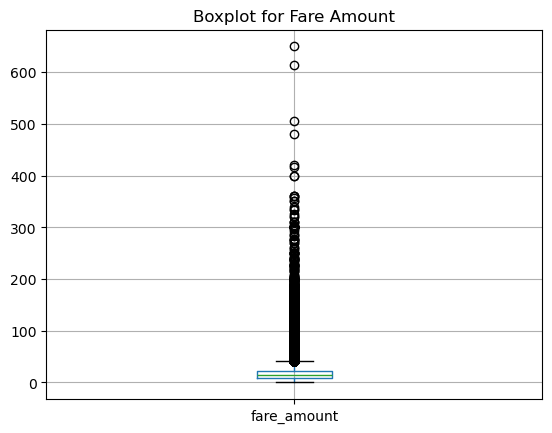

In [63]:
NYTaxidf.boxplot(column='fare_amount')
plt.title("Boxplot for Fare Amount")
plt.show()

In [61]:
Q1 = NYTaxidf['trip_distance'].quantile(0.25)
Q3 = NYTaxidf['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in trip_distance
outliers = NYTaxidf[(NYTaxidf['trip_distance'] < lower_bound) | (NYTaxidf['trip_distance'] > upper_bound)]
print(outliers)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-12-13 18:18:05   2023-12-13 19:08:44              1.0   
5              2  2023-02-07 18:05:10   2023-02-07 18:33:20              1.0   
15             2  2023-04-19 18:31:44   2023-04-19 18:53:01              1.0   
16             2  2023-10-01 12:04:05   2023-10-01 12:53:11              1.0   
20             1  2023-05-08 21:12:48   2023-05-08 21:41:14              2.0   
...          ...                  ...                   ...              ...   
249965         2  2023-12-17 18:29:38   2023-12-17 18:43:30              1.0   
249976         2  2023-05-15 18:58:52   2023-05-15 19:26:09              1.0   
249978         2  2023-12-04 06:24:56   2023-12-04 07:29:43              1.0   
249983         2  2023-04-15 03:52:30   2023-04-15 04:09:15              3.0   
249995         2  2023-06-13 23:16:52   2023-06-13 23:32:59              1.0   

        trip_distance  RatecodeID store

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [65]:
# remove passenger_count > 6
NYTaxidf = NYTaxidf[NYTaxidf['passenger_count'] < 6]

In [67]:
# Continue with outlier handling
NYTaxidf = NYTaxidf[~((NYTaxidf['trip_distance'] <= 0.1) & (NYTaxidf['fare_amount'] > 300))]


In [69]:
# Entries where trip_distance is more than 250 miles.
NYTaxidf = NYTaxidf[NYTaxidf['trip_distance'] <= 250]

In [71]:
# Do any columns need standardising?
NYTaxidf['Date'] = pd.to_datetime(NYTaxidf['Date'])
print(NYTaxidf['Date'].dtype)
NYTaxidf['tpep_pickup_datetime'] = pd.to_datetime(NYTaxidf['tpep_pickup_datetime'])
NYTaxidf['tpep_dropoff_datetime'] = pd.to_datetime(NYTaxidf['tpep_dropoff_datetime'])


datetime64[ns]


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [75]:
# Numerical Variables:

# passenger_count
# trip_distance
# pickup_hour
# trip_duration

# Categorical Variables:

# VendorID
# tpep_pickup_datetime
# tpep_dropoff_datetime
# RatecodeID
# PULocationID
# DOLocationID
# payment_type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

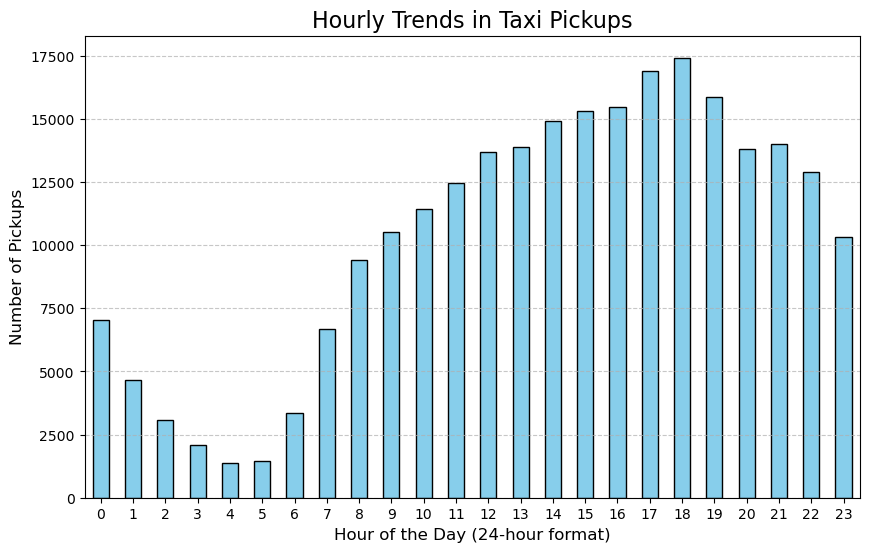

In [77]:
# Find and show the hourly trends in taxi pickups
hourly_trends = NYTaxidf.groupby('Hour').size()

# Plot the hourly trends
plt.figure(figsize=(10, 6))
hourly_trends.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hourly Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

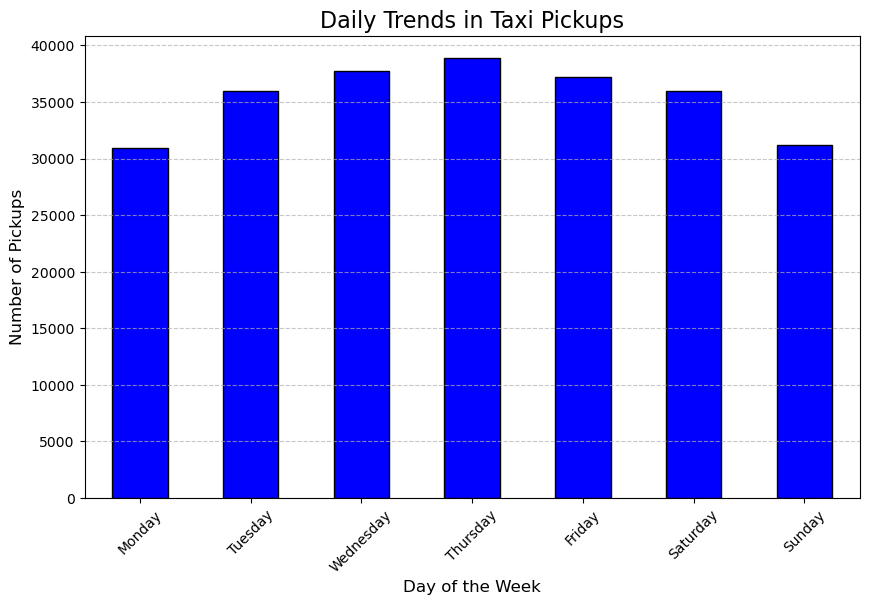

In [81]:
# Find and show the daily trends in taxi pickups (days of the week)
NYTaxidf['Day_of_Week'] = NYTaxidf['Date'].dt.day_name()
NYTaxidf['Day_of_Week']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
NYTaxidf['Day_of_Week'] = pd.Categorical(NYTaxidf['Day_of_Week'], categories=days_order, ordered=True)
daily_trends = NYTaxidf.groupby('Day_of_Week').size()

plt.figure(figsize=(10, 6))
daily_trends.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Daily Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


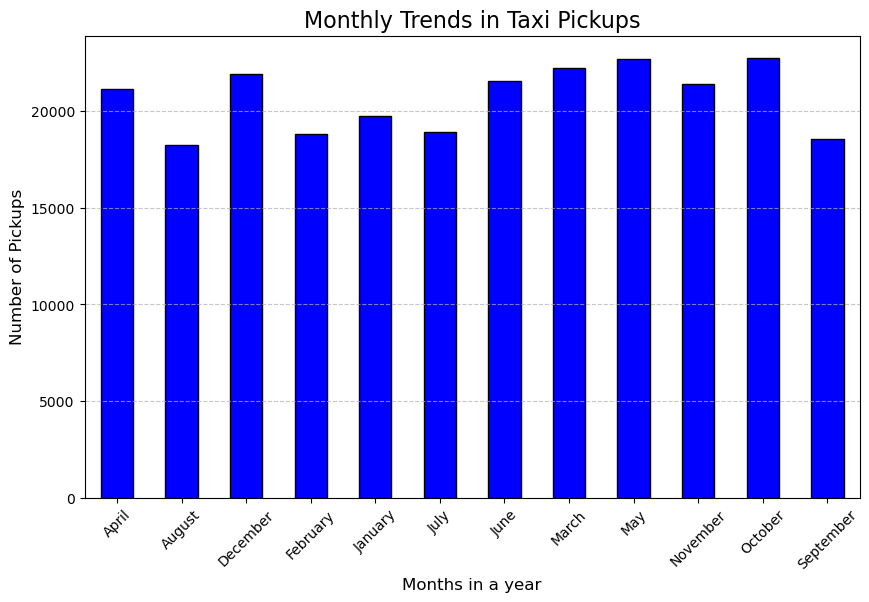

In [83]:
# Show the monthly trends in pickups
NYTaxidf['Month'] = NYTaxidf['Date'].dt.month_name()
monthly_trends = NYTaxidf.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Monthly Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Months in a year', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [85]:
# Analyse the above parameters
# fare_amount: Zero or negative values may indicate data errors or cases where the fare was not recorded.
# tip_amount: Zero could be valid (no tip was provided), but negative values are likely errors.
# total_amount: Zero or negative values are uncommon unless refunds or incorrect data entry occurred.
# trip_distance: Zero may occur for extremely short trips, but negative values are definitely data errors.
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for column in columns_to_check:
    zero_values = (NYTaxidf[column] == 0).sum()
    negative_values = (NYTaxidf[column] < 0).sum()
    print(f"{column} - Zero Values: {zero_values}, Negative Values: {negative_values}")

fare_amount - Zero Values: 91, Negative Values: 0
tip_amount - Zero Values: 56598, Negative Values: 0
total_amount - Zero Values: 46, Negative Values: 0
trip_distance - Zero Values: 4669, Negative Values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
# Yes Zero values in columns like fare_amount, total_amount, or trip_distance could indicate errors or edge cases that might skew results.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# tip_amount can be zero as customers might not given the tip . so no need to drop the  zero values in tip_amount

In [ ]:
# Create a df with non zero entries for the selected parameters.
# I dont want to filter zero values from above params


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

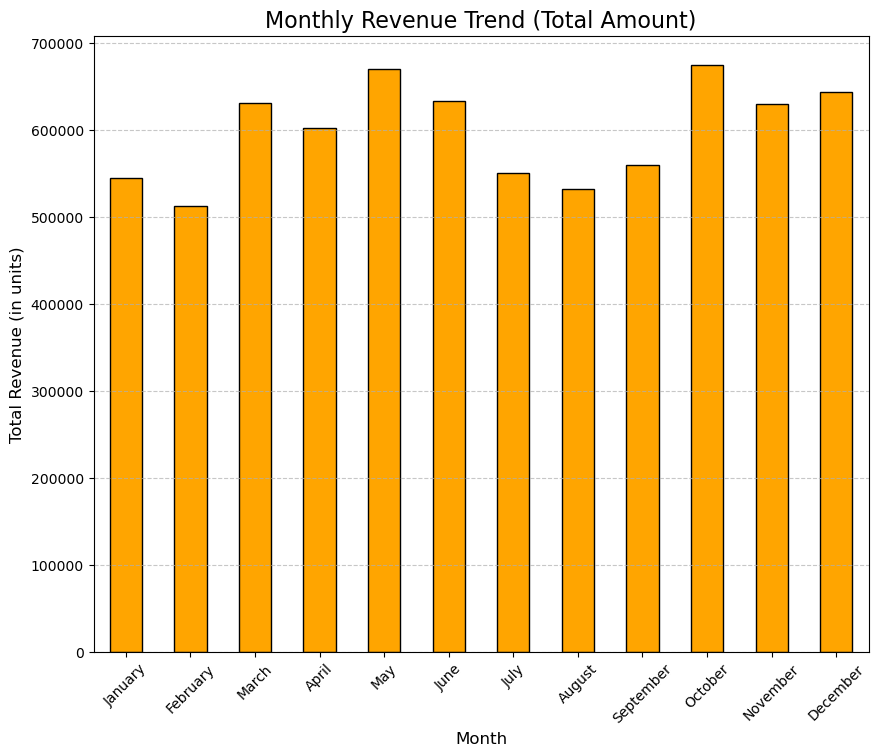

In [89]:
# Group data by month and analyse monthly revenue
NYTaxidf['Month'] = NYTaxidf['Date'].dt.month_name()
monthly_revenue = NYTaxidf.groupby('Month')['total_amount'].sum()

# Order the months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)

# Plot the monthly revenue trend
plt.figure(figsize=(10, 8))
monthly_revenue.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarter
1    1687036.32
2    1905483.79
3    1641830.15
4    1946844.67
Name: total_amount, dtype: float64


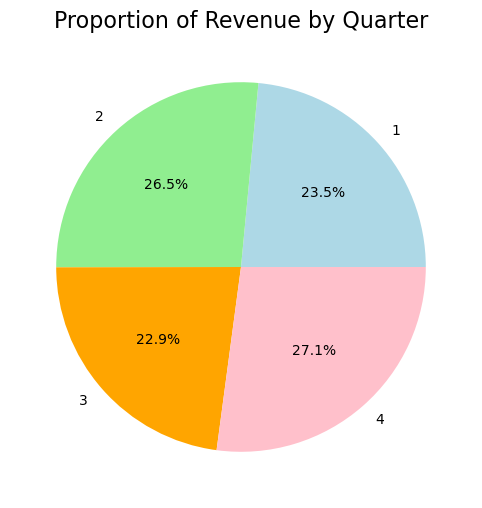

In [95]:
# Calculate proportion of each quarter
NYTaxidf['Quarter'] = NYTaxidf['Date'].dt.quarter
quarterly_revenue = NYTaxidf.groupby('Quarter')['total_amount'].sum()
print(quarterly_revenue)
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
plt.figure(figsize=(8, 6))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.title('Proportion of Revenue by Quarter', fontsize=16)
plt.ylabel('')  
plt.show()




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

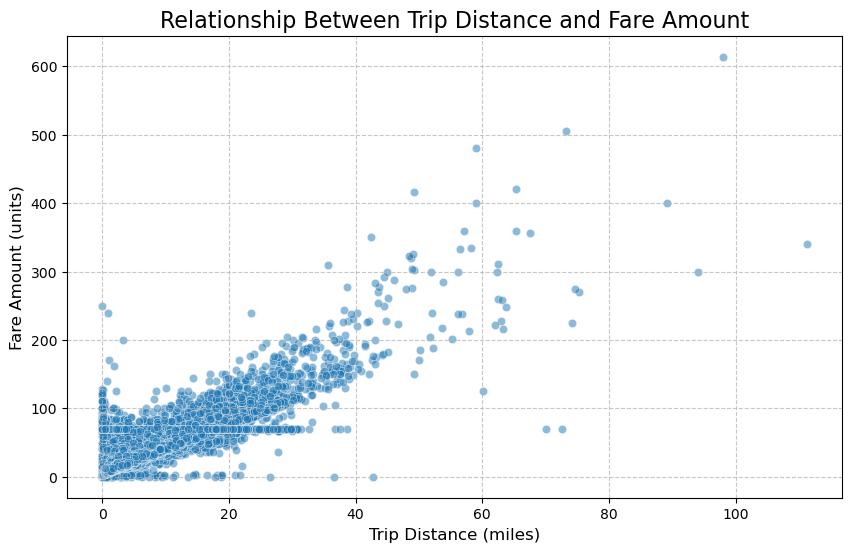

Correlation between Trip Distance and Fare Amount: 0.94


In [97]:
# Show how trip fare is affected by distance
# Filter out trips with zero distance
filtered_df = NYTaxidf[NYTaxidf['trip_distance'] > 0]

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount (units)', fontsize=12)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Calculate the correlation coefficient
correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

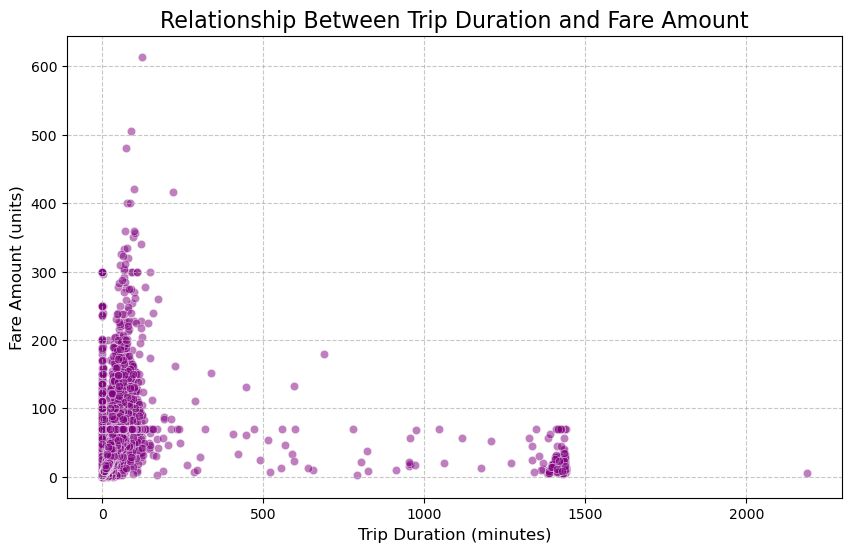

Correlation between Trip Duration and Fare Amount: 0.27


In [99]:
# Show relationship between fare and trip duration
NYTaxidf['trip_duration'] = (NYTaxidf['tpep_dropoff_datetime'] - NYTaxidf['tpep_pickup_datetime']).dt.total_seconds() / 60  # Convert to minutes

# Filter out trips with 0 or negative duration or fare amount
filtered_df = NYTaxidf[(NYTaxidf['trip_duration'] > 0) & (NYTaxidf['fare_amount'] > 0)]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_duration', y='fare_amount', alpha=0.5, color='purple')
plt.title('Relationship Between Trip Duration and Fare Amount', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount (units)', fontsize=12)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Calculate the correlation coefficient
correlation_value = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between Trip Duration and Fare Amount: {correlation_value:.2f}")


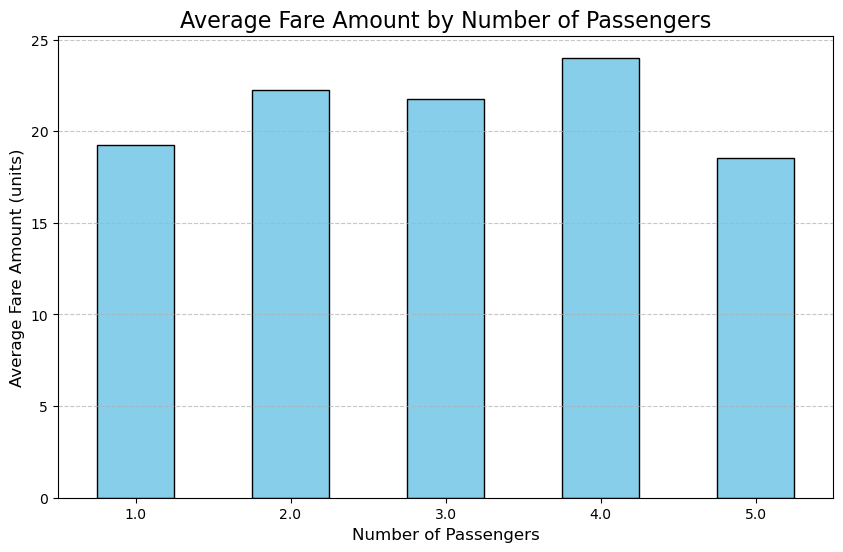

In [101]:
# Show relationship between fare and number of passengers
average_fare_per_passenger = NYTaxidf.groupby('passenger_count')['fare_amount'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_fare_per_passenger.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Fare Amount by Number of Passengers', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Average Fare Amount (units)', fontsize=12)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


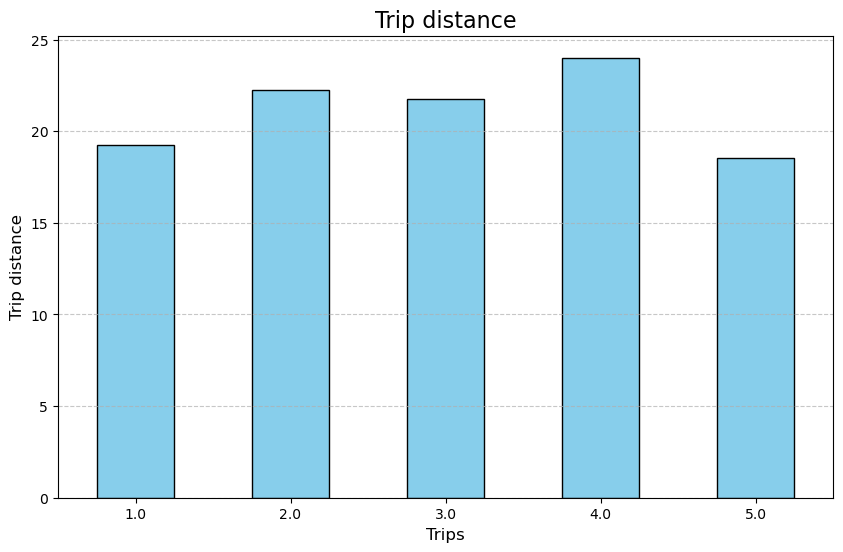

In [105]:
# Show relationship between tip and trip distance
trip_distance = NYTaxidf.groupby('trip_distance')

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_fare_per_passenger.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Trip distance', fontsize=16)
plt.xlabel('Trips', fontsize=12)
plt.ylabel('Trip distance', fontsize=12)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
Credit Card    195288
Cash            41118
NaN              8539
Dispute          1803
No Charge        1170
Name: count, dtype: int64


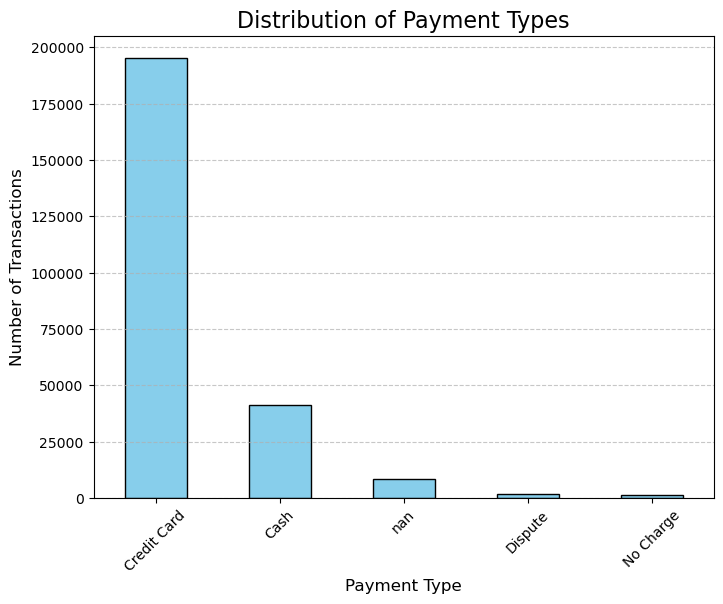

In [107]:
# Analyse the distribution of different payment types (payment_type).
payment_distribution = NYTaxidf['payment_type'].value_counts()

# Map payment type codes to meaningful names
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
payment_distribution.index = payment_distribution.index.map(payment_labels)

# Display the result
print(payment_distribution)
plt.figure(figsize=(8, 6))
payment_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [109]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [111]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file('/Users/macbookjp/Documents/PYTHONWS/EDA Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [113]:
print(zones.info())
# zones.plot()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [115]:
# Merge zones and trip records using locationID and PULocationID
merged_data_pickup = NYTaxidf.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_data_pickup.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Month,Quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-11-27 18:03:05,2023-11-27 18:21:38,1.0,4.54,1.0,N,170,74,1,...,November,4,18.550000,170.0,0.045769,0.000074,Murray Hill,170.0,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21..."
1,2,2023-12-13 18:18:05,2023-12-13 19:08:44,1.0,23.94,1.0,N,132,14,1,...,December,4,50.650000,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
2,2,2023-07-03 08:20:06,2023-07-03 08:33:37,1.0,2.98,1.0,N,163,75,1,...,July,3,13.516667,163.0,0.034177,0.000041,Midtown North,163.0,Manhattan,"POLYGON ((989412.663 219020.943, 990045.841 21..."
3,2,2023-07-29 15:21:06,2023-07-29 15:32:13,1.0,1.36,1.0,N,43,161,2,...,July,3,11.116667,43.0,0.099739,0.000380,Central Park,43.0,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
4,2,2023-02-06 09:24:49,2023-02-06 09:28:12,1.0,0.54,1.0,N,90,246,1,...,February,1,3.383333,90.0,0.030759,0.000055,Flatiron,90.0,Manhattan,"POLYGON ((985265.129 208165.863, 985125.733 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [117]:
# Group data by location and calculate the number of trips
trips_by_pickup_location = NYTaxidf.groupby('PULocationID').size()
trips_by_pickup_location
# Assign a name to the Series
trips_by_pickup_location.name = 'Number_of_Trips'

# Convert the Series to a DataFrame if necessary
trips_by_pickup_location = trips_by_pickup_location.reset_index()
trips_by_pickup_location.columns = ['LocationID', 'Number_of_Trips']
trips_by_pickup_location.head()

,LocationID,Number_of_Trips
0,1,35
1,2,2
2,3,6
3,4,326
4,5,1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [119]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_by_pickup_location, on='LocationID', how='left')
zones_with_trips.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Number_of_Trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",35.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",6.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",326.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

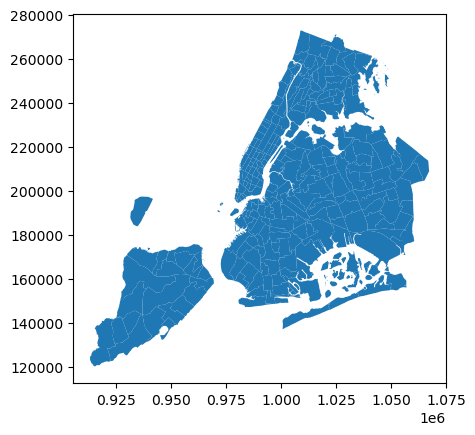

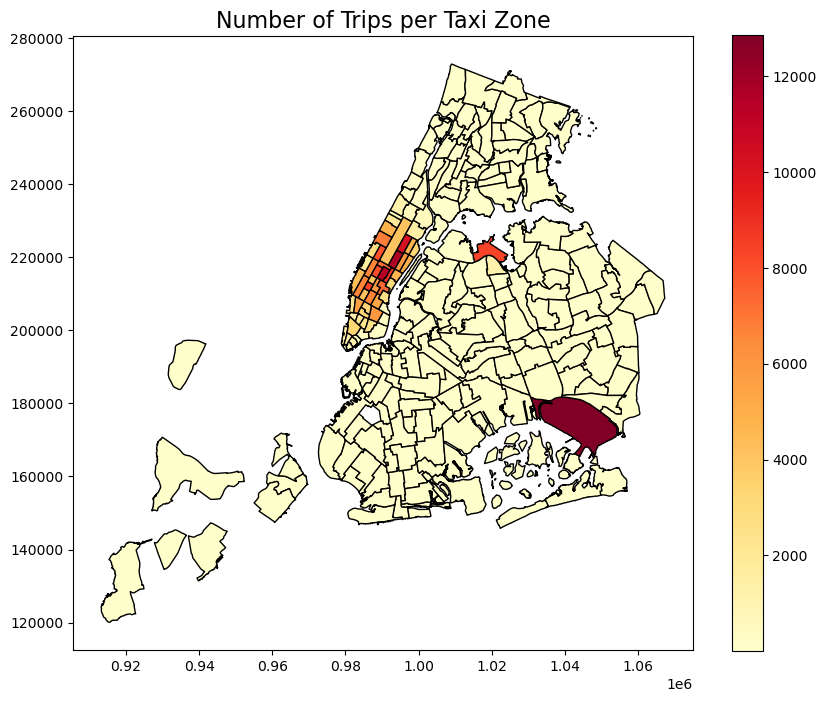

In [121]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map and display it
zones_with_trips.plot(
    column='Number_of_Trips',    # Column to use for the choropleth
    cmap='YlOrRd',              # Color map (Yellow to Red)
    legend=True,                # Show legend
    ax=ax,                      # Use the defined axis
    edgecolor='black'           # Add black edges to zones
)

# Add a title to the map
ax.set_title('Number of Trips per Taxi Zone', fontsize=16)

# Display the plot
plt.show()



In [123]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_trips.sort_values(by='Number_of_Trips', ascending=False)

# Display the sorted DataFrame
print(zones_sorted[['zone', 'Number_of_Trips']].head())


                      zone  Number_of_Trips
131            JFK Airport          12861.0
236  Upper East Side South          11662.0
160         Midtown Center          11370.0
235  Upper East Side North          10220.0
161           Midtown East           8791.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [125]:
# Find routes which have the slowest speeds at different times of the day
NYTaxidf['trip_duration'] = (NYTaxidf['tpep_dropoff_datetime'] - NYTaxidf['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
slow_routes = NYTaxidf.groupby(['PULocationID', 'DOLocationID', 'Hour'])['trip_duration'].mean()

# Reset index to convert the Series to a DataFrame
slow_routes = slow_routes.reset_index()
slow_routes.columns = ['PULocationID', 'DOLocationID', 'Hour', 'Average_Trip_Duration']

# Display the slow routes data
print(slow_routes.tail(30))


       PULocationID  DOLocationID  Hour  Average_Trip_Duration
61293           265           231     8              60.283333
61294           265           238    15              48.500000
61295           265           239     6              60.250000
61296           265           244    17              59.400000
61297           265           250    18              14.333333
61298           265           258    17               0.050000
61299           265           264    10               0.050000
61300           265           264    11               0.000000
61301           265           265     0               1.188889
61302           265           265     1               0.075000
61303           265           265     2               4.787500
61304           265           265     3              13.940000
61305           265           265     4               0.958333
61306           265           265     7              60.683333
61307           265           265     8               0

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

    Hour  Number_of_Trips
0      0             7023
1      1             4677
2      2             3066
3      3             2078
4      4             1361
5      5             1444
6      6             3359
7      7             6688
8      8             9404
9      9            10527
10    10            11441
11    11            12444
12    12            13678
13    13            13878
14    14            14921
15    15            15302
16    16            15466
17    17            16895
18    18            17415
19    19            15844
20    20            13794
21    21            13998
22    22            12878
23    23            10337


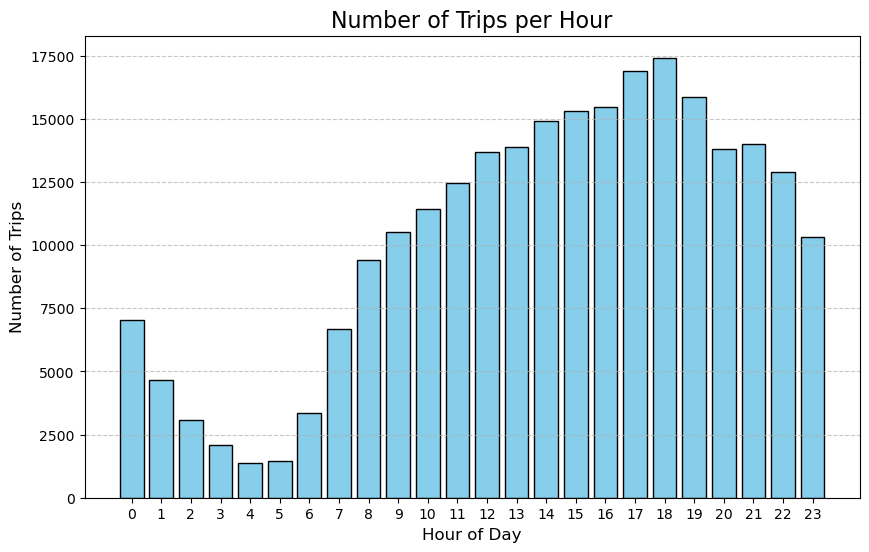

In [127]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = NYTaxidf.groupby('Hour').size()
trips_per_hour
trips_per_hour = trips_per_hour.reset_index()
trips_per_hour.columns = ['Hour', 'Number_of_Trips']

# Display the grouped data
print(trips_per_hour)
plt.figure(figsize=(10, 6))
plt.bar(trips_per_hour['Hour'], trips_per_hour['Number_of_Trips'], color='skyblue', edgecolor='black')
plt.title('Number of Trips per Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours (0 to 23) are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [129]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour['Actual_Number_of_Trips'] = trips_per_hour['Number_of_Trips'] * (1 / sample_fraction)
print(trips_per_hour)



    Hour  Number_of_Trips  Actual_Number_of_Trips
0      0             7023                140460.0
1      1             4677                 93540.0
2      2             3066                 61320.0
3      3             2078                 41560.0
4      4             1361                 27220.0
5      5             1444                 28880.0
6      6             3359                 67180.0
7      7             6688                133760.0
8      8             9404                188080.0
9      9            10527                210540.0
10    10            11441                228820.0
11    11            12444                248880.0
12    12            13678                273560.0
13    13            13878                277560.0
14    14            14921                298420.0
15    15            15302                306040.0
16    16            15466                309320.0
17    17            16895                337900.0
18    18            17415                348300.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Day_Type
Weekday    180684
Weekend     67234
dtype: int64


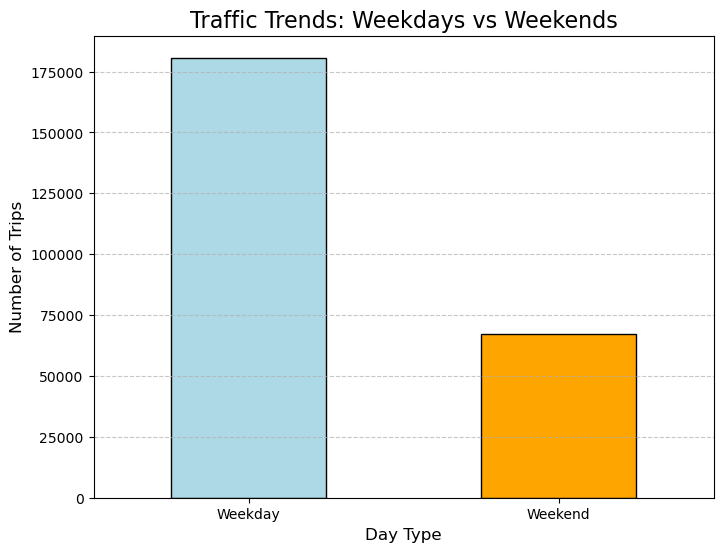

In [131]:
# Compare traffic trends for the week days and weekends
NYTaxidf['Day_Type'] = NYTaxidf['Day_of_Week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
traffic_trends = NYTaxidf.groupby('Day_Type').size()
print(traffic_trends)
plt.figure(figsize=(8, 6))
traffic_trends.plot(kind='bar', color=['lightblue', 'orange'], edgecolor='black')
plt.title('Traffic Trends: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Weekday is the busiest period
# Busy weekdays might result in consistent revenue, while weekends could bring a spike, especially in leisure-focused zones.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [133]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = NYTaxidf['PULocationID'].value_counts().head(10)

# Group by drop-off zones and count the frequency
top_dropoff_zones = NYTaxidf['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones:")
print(top_pickup_zones)

print("\nTop 10 Drop-off Zones:")
print(top_dropoff_zones)


Top 10 Pickup Zones:
PULocationID
132    12861
237    11662
161    11370
236    10220
162     8791
186     8431
138     8352
230     8063
142     8037
170     7371
Name: count, dtype: int64

Top 10 Drop-off Zones:
DOLocationID
236    10875
237    10414
161     9447
230     7537
170     7399
162     7023
142     6922
239     6894
141     6637
68      6377
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [135]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = NYTaxidf['PULocationID'].value_counts()
dropoff_counts = NYTaxidf['DOLocationID'].value_counts()

# Combine the counts into a single DataFrame
zone_ratios = pd.DataFrame({
    'Pickup_Count': pickup_counts,
    'Dropoff_Count': dropoff_counts
})

# Calculate the ratio of pickups to drop-offs
zone_ratios['Pickup_to_Dropoff_Ratio'] = zone_ratios['Pickup_Count'] / zone_ratios['Dropoff_Count'].replace(0, float('inf'))

# Sort by ratios
highest_ratios = zone_ratios.sort_values(by='Pickup_to_Dropoff_Ratio', ascending=False).head(10)
lowest_ratios = zone_ratios.sort_values(by='Pickup_to_Dropoff_Ratio', ascending=True).head(10)

# Display the results
print("Top 10 Zones with Highest Pickup-to-Dropoff Ratios:")
print(highest_ratios[['Pickup_Count', 'Dropoff_Count', 'Pickup_to_Dropoff_Ratio']])

print("\nTop 10 Zones with Lowest Pickup-to-Dropoff Ratios:")
print(lowest_ratios[['Pickup_Count', 'Dropoff_Count', 'Pickup_to_Dropoff_Ratio']])



Top 10 Zones with Highest Pickup-to-Dropoff Ratios:
     Pickup_Count  Dropoff_Count  Pickup_to_Dropoff_Ratio
70         1180.0          138.0                 8.550725
132       12861.0         3012.0                 4.269920
138        8352.0         3167.0                 2.637196
186        8431.0         5443.0                 1.548962
23           10.0            7.0                 1.428571
43         4100.0         2933.0                 1.397886
249        5603.0         4098.0                 1.367252
114        3274.0         2400.0                 1.364167
162        8791.0         7023.0                 1.251744
153           5.0            4.0                 1.250000

Top 10 Zones with Lowest Pickup-to-Dropoff Ratios:
     Pickup_Count  Dropoff_Count  Pickup_to_Dropoff_Ratio
15            1.0           37.0                 0.027027
160           3.0           70.0                 0.042857
150           1.0           22.0                 0.045455
1            35.0         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [137]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_rides = NYTaxidf[
    (NYTaxidf['Hour'] >= 23) | 
    (NYTaxidf['Hour'] < 5)
]

# Count pickups by zone
night_pickup_counts = night_rides['PULocationID'].value_counts().head(10)

# Count drop-offs by zone
night_dropoff_counts = night_rides['DOLocationID'].value_counts().head(10)

# Display the results
print("Top 10 Zones with High Pickup Traffic During Night Hours:")
print(night_pickup_counts)

print("\nTop 10 Zones with High Dropoff Traffic During Night Hours:")
print(night_dropoff_counts)



Top 10 Zones with High Pickup Traffic During Night Hours:
PULocationID
79     2072
132    1808
249    1778
48     1280
148    1272
114    1163
230    1064
68      856
186     831
164     803
Name: count, dtype: int64

Top 10 Zones with High Dropoff Traffic During Night Hours:
DOLocationID
79     1140
48      960
170     832
107     767
68      752
141     702
263     691
249     632
90      599
236     582
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [139]:
# Filter for night hours (11 PM to 5 AM)
def categorize_time(hour):
    if hour >= 23 or hour < 5:
        return 'Nighttime'
    else:
        return 'Daytime'

NYTaxidf['Time_Period'] = NYTaxidf['Hour'].apply(categorize_time)

# Calculate total revenue for nighttime and daytime
revenue_by_time_period = NYTaxidf.groupby('Time_Period')['total_amount'].sum()

# Calculate revenue share as percentages
total_revenue = revenue_by_time_period.sum()
revenue_share = (revenue_by_time_period / total_revenue) * 100

# Display the revenue share
print("Revenue Share (%):")
print(revenue_share)



Revenue Share (%):
Time_Period
Daytime      88.443901
Nighttime    11.556099
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [141]:
# Analyse the fare per mile per passenger for different passenger counts
valid_rides = NYTaxidf[(NYTaxidf['trip_distance'] > 0) & (NYTaxidf['fare_amount'] > 0) & (NYTaxidf['passenger_count'] > 0)]
valid_rides['fare_per_mile'] = valid_rides['fare_amount'] / valid_rides['trip_distance']
avg_fare_per_mile = valid_rides.groupby('passenger_count')['fare_per_mile'].mean()
print("Average Fare per Mile for Each Passenger Count:")
print(avg_fare_per_mile)



Average Fare per Mile for Each Passenger Count:
passenger_count
1.0    10.584517
2.0    13.372738
3.0    11.878444
4.0    13.108979
5.0     8.180610
Name: fare_per_mile, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [143]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_by_hour = valid_rides.groupby('Hour')['fare_per_mile'].mean()

# Group by days of the week and calculate average fare per mile
avg_fare_by_day = valid_rides.groupby('Day_of_Week')['fare_per_mile'].mean()

# Display results
print("Average Fare per Mile by Hours of the Day:")
print(avg_fare_by_hour)

print("\nAverage Fare per Mile by Days of the Week:")
print(avg_fare_by_day)


Average Fare per Mile by Hours of the Day:
Hour
0     12.284671
1     12.579910
2     10.086385
3      7.368270
4     13.946609
5     16.679447
6     12.083199
7      8.691132
8      9.778370
9      9.150596
10    10.331767
11    12.971406
12    10.999004
13    11.513812
14    11.084381
15    11.945826
16    12.595621
17    10.931721
18    10.991217
19    11.585971
20    11.492946
21    10.186012
22     8.702045
23    11.360497
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Days of the Week:
Day_of_Week
Monday       11.465054
Tuesday      11.503264
Wednesday    10.566839
Thursday     11.491823
Friday       11.061376
Saturday     10.434750
Sunday       11.006006
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [145]:
# Compare fare per mile for different vendors
avg_fare_for_diff_vendor = valid_rides.groupby(['Hour','VendorID'])['fare_per_mile'].mean()
print("Average Fare per Mile for different vendor :")
print(avg_fare_for_diff_vendor)


Average Fare per Mile for different vendor :
Hour  VendorID
0     1            7.189417
      2           13.766847
      6            2.977608
1     1            6.690659
      2           14.175739
                    ...    
21    2           11.097095
22    1            7.124033
      2            9.176881
23    1            6.963810
      2           12.620376
Name: fare_per_mile, Length: 62, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [147]:
# Defining distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return 'Up to 2 Miles'
    elif 2 < distance <= 5:
        return '2 to 5 Miles'
    else:
        return 'More than 5 Miles'

valid_rides['Distance_Tier'] = valid_rides['trip_distance'].apply(categorize_distance)

# Group by VendorID and Distance_Tier to calculate average fare per mile
tiered_fare_analysis = valid_rides.groupby(['VendorID', 'Distance_Tier'])['fare_per_mile'].mean()

# Reset index for easier reading
tiered_fare_analysis = tiered_fare_analysis.reset_index()

# Display results
print("Tiered Fare Analysis by Vendor:")
print(tiered_fare_analysis)


Tiered Fare Analysis by Vendor:
   VendorID      Distance_Tier  fare_per_mile
0         1       2 to 5 Miles       6.397655
1         1  More than 5 Miles       4.429217
2         1      Up to 2 Miles       9.867575
3         2       2 to 5 Miles       6.537439
4         2  More than 5 Miles       4.490304
5         2      Up to 2 Miles      17.552111
6         6       2 to 5 Miles       9.306429
7         6  More than 5 Miles       4.234258
8         6      Up to 2 Miles      33.211423


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [149]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_rides = NYTaxidf[(NYTaxidf['tip_amount'] > 0) & (NYTaxidf['total_amount'] > 0)]

# Calculate tip percentage
valid_rides['tip_percentage'] = (valid_rides['tip_amount'] / valid_rides['total_amount']) * 100
valid_rides['Distance_Tier'] = valid_rides['trip_distance'].apply(categorize_distance)
avg_tip_by_distance = valid_rides.groupby('Distance_Tier')['tip_percentage'].mean()

# Analyze by passenger count
avg_tip_by_passenger = valid_rides.groupby('passenger_count')['tip_percentage'].mean()

# Analyze by pickup time
valid_rides['Pickup_Hour'] = valid_rides['tpep_pickup_datetime'].dt.hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 23:
        return 'Evening'
    else:
        return 'Night'

valid_rides['Time_Period'] = valid_rides['Pickup_Hour'].apply(categorize_time)
avg_tip_by_time = valid_rides.groupby('Time_Period')['tip_percentage'].mean()

# Display results
print("Average Tip Percentage by Distance:")
print(avg_tip_by_distance)

print("\nAverage Tip Percentage by Passenger Count:")
print(avg_tip_by_passenger)

print("\nAverage Tip Percentage by Pickup Time:")
print(avg_tip_by_time)


Average Tip Percentage by Distance:
Distance_Tier
2 to 5 Miles         15.109636
More than 5 Miles    15.039898
Up to 2 Miles        15.643294
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_count
1.0    15.382461
2.0    15.408727
3.0    15.400907
4.0    15.548896
5.0    15.510421
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Time:
Time_Period
Afternoon    15.546276
Evening      15.304238
Morning      15.442160
Night        15.194779
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [151]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_rides = valid_rides[valid_rides['tip_percentage'] < 10]
high_tip_rides = valid_rides[valid_rides['tip_percentage'] > 25]

# Analyze trip distance, fare, passenger count, and pickup hour for each group
low_tip_summary = {
    'Average Distance': low_tip_rides['trip_distance'].mean(),
    'Average Fare': low_tip_rides['fare_amount'].mean(),
    'Average Passenger Count': low_tip_rides['passenger_count'].mean(),
    'Average Pickup Hour': low_tip_rides['tpep_pickup_datetime'].dt.hour.mean()
}

high_tip_summary = {
    'Average Distance': high_tip_rides['trip_distance'].mean(),
    'Average Fare': high_tip_rides['fare_amount'].mean(),
    'Average Passenger Count': high_tip_rides['passenger_count'].mean(),
    'Average Pickup Hour': high_tip_rides['tpep_pickup_datetime'].dt.hour.mean()
}

# Display results
print("Summary of Low Tip Percentage Trips (< 10%):")
print(low_tip_summary)

print("\nSummary of High Tip Percentage Trips (> 25%):")
print(high_tip_summary)


Summary of Low Tip Percentage Trips (< 10%):
{'Average Distance': 3.628771314119607, 'Average Fare': 20.611811833102912, 'Average Passenger Count': 1.3011095749583466, 'Average Pickup Hour': 14.298557198057358}

Summary of High Tip Percentage Trips (> 25%):
{'Average Distance': 2.0963027888446213, 'Average Fare': 13.031099601593626, 'Average Passenger Count': 1.2693227091633466, 'Average Pickup Hour': 13.495617529880478}


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

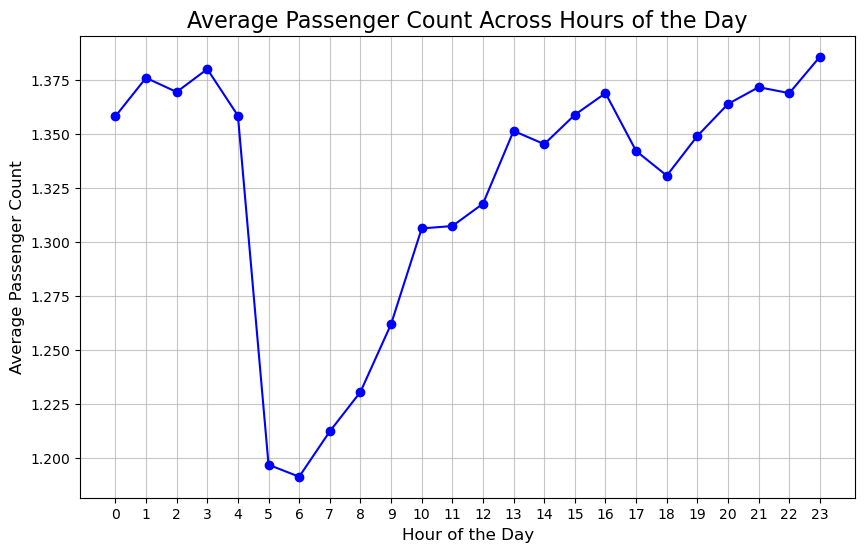

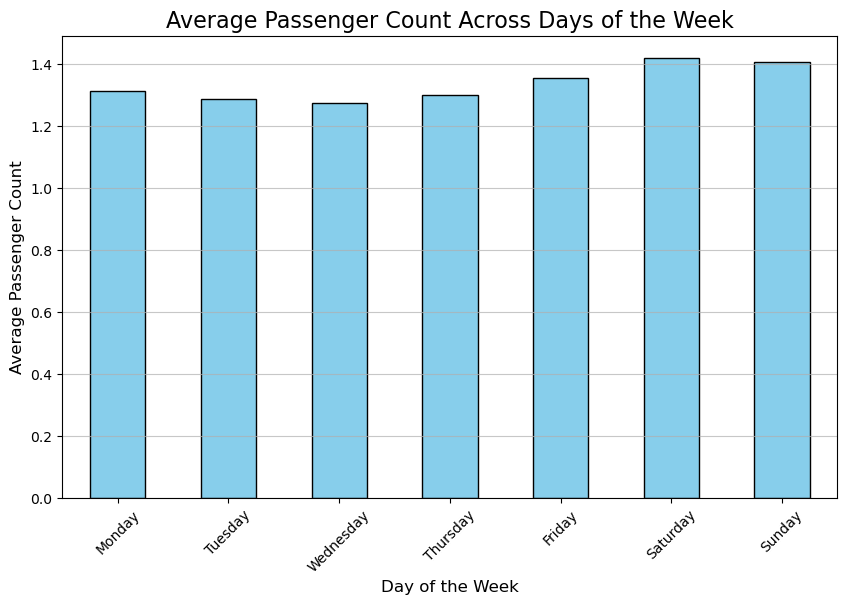

In [155]:
# See how passenger count varies across hours and days
avg_passenger_by_hour = NYTaxidf.groupby('Hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = NYTaxidf.groupby('Day_of_Week')['passenger_count'].mean()

# Sort days of the week in order (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_passenger_by_day = avg_passenger_by_day.reindex(day_order)

# Plot variation across hours of the day
plt.figure(figsize=(10, 6))
avg_passenger_by_hour.plot(kind='line', marker='o', color='blue')
plt.title('Average Passenger Count Across Hours of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Passenger Count', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.7)
plt.show()

# Plot variation across days of the week
plt.figure(figsize=(10, 6))
avg_passenger_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Passenger Count Across Days of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Passenger Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [157]:
# How does passenger count vary across zones
avg_passenger_by_pickup_zone = NYTaxidf.groupby('PULocationID')['passenger_count'].mean()

# Group by drop-off zones and calculate average passenger count
avg_passenger_by_dropoff_zone = NYTaxidf.groupby('DOLocationID')['passenger_count'].mean()

# Sort results
avg_passenger_by_pickup_zone = avg_passenger_by_pickup_zone.sort_values(ascending=False)
avg_passenger_by_dropoff_zone = avg_passenger_by_dropoff_zone.sort_values(ascending=False)

# Display top zones
print("Top Zones by Average Passenger Count (Pickup):")
print(avg_passenger_by_pickup_zone.head(10))

print("\nTop Zones by Average Passenger Count (Drop-off):")
print(avg_passenger_by_dropoff_zone.head(10))


Top Zones by Average Passenger Count (Pickup):
PULocationID
6      3.000000
217    2.111111
128    2.000000
58     2.000000
57     2.000000
96     2.000000
257    1.800000
12     1.738318
1      1.657143
93     1.625000
Name: passenger_count, dtype: float64

Top Zones by Average Passenger Count (Drop-off):
DOLocationID
176    2.500000
109    2.500000
12     1.871622
172    1.750000
251    1.666667
180    1.600000
252    1.568182
1      1.549525
31     1.533333
128    1.526316
Name: passenger_count, dtype: float64


In [159]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips['zone'] = zones_with_trips['zone'].astype(str)
NYTaxidf['PULocationID'] = NYTaxidf['PULocationID'].astype(str)

# Merge the data based on 'zone' and 'PULocationID'
merged_data = pd.merge(zones_with_trips, NYTaxidf, left_on='zone', right_on='PULocationID', how='left')

# Group the merged data by 'zone' and calculate the average passenger count
average_passenger_counts = merged_data.groupby('zone')['passenger_count'].mean()

# Map the average passenger count back to the original GeoDataFrame
zones_with_trips['Average_Passenger_Count'] = zones_with_trips['zone'].map(average_passenger_counts)

# Preview the updated GeoDataFrame with the new column
print(zones_with_trips[['zone', 'Average_Passenger_Count']])

# Display information about the updated GeoDataFrame
zones_with_trips.info()


                        zone  Average_Passenger_Count
0             Newark Airport                      NaN
1                Jamaica Bay                      NaN
2    Allerton/Pelham Gardens                      NaN
3              Alphabet City                      NaN
4              Arden Heights                      NaN
..                       ...                      ...
258       Woodlawn/Wakefield                      NaN
259                 Woodside                      NaN
260       World Trade Center                      NaN
261           Yorkville East                      NaN
262           Yorkville West                      NaN

[263 rows x 2 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 263 non-null    int32   
 1   Shape_Leng               263 non-null    float

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [161]:
# How often is each surcharge applied?
extra_charges = NYTaxidf[NYTaxidf['extra'] > 0]

# Group by pickup zones and calculate the frequency of extra charges
pickup_extra_charges = extra_charges['PULocationID'].value_counts()

# Group by drop-off zones and calculate the frequency of extra charges
dropoff_extra_charges = extra_charges['DOLocationID'].value_counts()

# Extract hour and day of the week from pickup datetime
extra_charges['Hour'] = extra_charges['tpep_pickup_datetime'].dt.hour
extra_charges['Day_of_Week'] = extra_charges['tpep_pickup_datetime'].dt.day_name()

# Calculate frequency of extra charges by hour
hourly_extra_charges = extra_charges['Hour'].value_counts()

# Calculate frequency of extra charges by day of the week
daily_extra_charges = extra_charges['Day_of_Week'].value_counts()

# Display results
print("Frequency of Extra Charges by Pickup Zone:")
print(pickup_extra_charges.head(10))

print("\nFrequency of Extra Charges by Drop-off Zone:")
print(dropoff_extra_charges.head(10))

print("\nFrequency of Extra Charges by Hour:")
print(hourly_extra_charges)

print("\nFrequency of Extra Charges by Day of the Week:")
print(daily_extra_charges)


Frequency of Extra Charges by Pickup Zone:
PULocationID
138    8231
161    7236
237    6598
132    6304
162    5392
236    5301
230    5280
142    4990
186    4826
163    4529
Name: count, dtype: int64

Frequency of Extra Charges by Drop-off Zone:
DOLocationID
236    6205
237    5696
161    4647
170    4449
230    4378
239    4222
141    4212
142    4071
48     3990
162    3852
Name: count, dtype: int64

Frequency of Extra Charges by Hour:
Hour
18    13703
17    13195
21    13133
20    12740
19    12419
22    11991
16    11487
23     9537
0      6396
15     4567
14     4446
1      4311
13     4104
12     4063
11     3662
10     3468
9      3101
2      2838
8      2694
7      1892
3      1880
5      1128
4      1102
6      1064
Name: count, dtype: int64

Frequency of Extra Charges by Day of the Week:
Day_of_Week
Thursday     25094
Friday       24573
Wednesday    24144
Tuesday      22527
Monday       18830
Saturday     18170
Sunday       15583
Name: count, dtype: int64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Prioritize taxi services on routes with the highest trip numbers , such as the Upper East Side South,
Midtown Center,Upper East Side North
Ensure the credit card payment system functions efficiently, considering it is the dominant payment choice.
chedule drivers dynamically to align with the busiest hours(Weekdays between 5PM to 8PM)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
In a Day peak time will be between 5PM to 7PM on weekday
Deploying more cars on weekdays is helpful to increase the business
Deploying cabs in airport zone is recommended

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Peak Hours: Increase base fares during high-demand periods (Weekdays between 5PM - 9PM).
Low-Demand Hours: Offer discounted fares to encourage more ridership.
Increase the airport surcharge for high-demand pickup/drop-off locations as number of trips recoreded is more in JFK airport zone